In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

N = 10000

def wichmannHill():
    rand = []
    s1 = 14327
    s2 = 23564
    s3 = 27983
    for i in range(N):
        s1 = 171*s1 % 30269
        s2 = 172*s2 % 30307
        s3 = 170*s3 % 30323
        u = (s1/float(30269)+s2/float(30307)+s3/float(30323)) % 1
        rand.append(u)
    return rand

def genValAleat(Px):
    PxAcum = Px
    PxAcum[0] = Px[0]
    for i in range(len(Px)-1):
        PxAcum[i+1] = PxAcum[i] + Px[i+1]   
    PxAcum = [0] + PxAcum
    Valeat = []
    genAleat = wichmannHill()
    #genAleat = rnd.CongMixto(N)
    for i in range(len(genAleat)):
        for j in range(len(PxAcum)-1):
            if(genAleat[i] > PxAcum[j] and genAleat[i] <= PxAcum[j+1]):
                Valeat += [j]
                break
    #print "Dados ",Valeat 
    return Valeat

def c(k):
    ck = 1.0
    if(k >= 1):
        ck = 0.0
        for m in range(k):
            ck += (c(m)*c(k-1-m))/float((m+1)*((2*m)+1))
    return ck

def erfInv(z):
    erf = 0
    infinito = 5
    for k in range(infinito):
        erf += (c(k)/float((2*k)+1))*((math.sqrt(math.pi)*z/float(2))**((2*k)+1))
    return erf
   

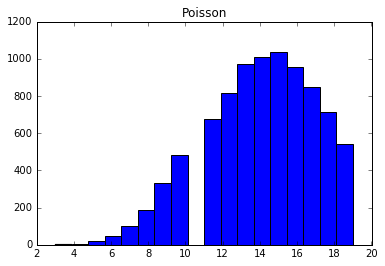

In [3]:
def poisson(ly,k):
    Px = [1.0] * k
    for kx in range(k):
        Px[kx] = (math.exp(-ly) * (ly ** kx))/float(math.factorial(kx))
    return Px

Px = poisson(15,20)
Valeat = genValAleat(Px)

plt.hist(Valeat,np.max(Valeat)-1)
plt.title("Poisson")
plt.show()

[0.12855458572830386, -1.2873710800286193, 0.03355450639577451, 0.6709787524508112, -0.8298535840338526, -1.4123137494704676, 0.2760330376468792, 1.7656999543797158, 0.8416304646908763, -1.0896004500240861, 1.100952995905662, -1.7099281841789689, -0.17138609523867243, 1.0019301846089497, 0.7666698036622535, -0.9577327470841788, -0.13149917833364622, -0.6481407609012483, 0.970089459982577, -0.2588713482366645, -0.2557040601338441, -0.3518005438299235, -0.8794411770358921, 1.0122780760819223, 0.30478519479919497, 0.3201368244986071, 0.3235048510741404, 1.4776633041741511, 1.4747938056338854, 0.9477609496943363, -0.9693760237230891, -0.11760747939474428, 1.4135940802328, 0.14524149248763593, -1.8528527611360324, -0.5457496780588411, -1.5370672679485216, 1.5076614607450045, -1.3965781335729424, -0.24435318776496126, 0.5068949208367506, -0.36529552881549654, 0.307147720230214, -0.4802448793437413, 0.677208862591413, -1.145708594122029, 0.6404547907840686, -0.09314646954924802, -0.2260625177

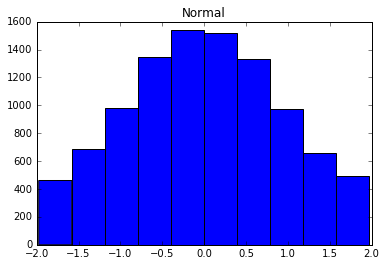

In [5]:
def normal(miu,var):
    teta = math.sqrt(var) 
    Px = [1.0] * N
    p = wichmannHill()
    for i in range(len(Px)):
        Px[i] = miu + (teta*math.sqrt(2)*erfInv((2*p[i])-1))
    return Px
        
Px = normal(0,1)
print(Px)
plt.hist(Px)
plt.title("Normal")
plt.show()
